# Mobile Price Classification
# Features
#### 1]	battery_power :-	Total energy a battery can store in one time measured in (mAh)
#### 2]blue :-	Has bluetooth or not
#### 3]	clock_speed	:- Speed at which microprocessor executes instructions
#### 4] dual_sim	:- Has dual sim support or not
#### 5]	fc :-	Front camera (Megapixels)
#### 6]	four_g	:- Has 4G or not
#### 7]	int_memory :-	Internal memory in (Gigabytes)
#### 8]	m_dep :-	Mobile depth in (Cm)
#### 9]	mobile_wt :-	Weight of mobile phone
#### 10]	pc :-	Primary camera (Megapixels)
#### 11]	px_height :-	Pixel resolution height
#### 12]	px_width :- Pixel resolution width
#### 13]	ram	:- Random access memory in (Megabytes)
#### 14]	sc_h :- Screen height of mobile in (Cm)
#### 15]	sc_w :-	Screen width of mobile in (Cm)
#### 16]	talk_time :-	Longest time that a single battery charge will last when you are constantly talking on the phone
#### 17]	three_g :-	Has 3G or not
#### 18]	touch_screen :-	Has touch screen or not
#### 19]	wifi :-	Has wifi or not
#### 20]	n_cores :-	Number of cores of processor
#### 21]	price_range :-	This is the Target variable with value of 0: (Low Cost), 1: (Medium Cost), 2: (High Cost), and 3: (Very High Cost)


In [1]:
import pandas as pd  #importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('/content/train.csv') ### Reading/loading the datasets
test=pd.read_csv('/content/train.csv')

# Preparing and Cleaning the Dataset

In [3]:
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
test.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [6]:
test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
train.shape

(2000, 21)

In [8]:
train['price_range'].unique()

array([1, 2, 3, 0])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
train['clock_speed']=train['clock_speed'].astype('int64')
train['m_dep']=train['m_dep'].astype('int64')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

In [12]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.0290,0.509500,4.309500,0.521500,32.046500,0.05300,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.8506,0.500035,4.341444,0.499662,18.145715,0.22409,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.0000,0.000000,0.000000,0.000000,2.000000,0.00000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.0000,0.000000,1.000000,0.000000,16.000000,0.00000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.0000,1.000000,3.000000,1.000000,32.000000,0.00000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.0000,1.000000,7.000000,1.000000,48.000000,0.00000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.0000,1.000000,19.000000,1.000000,64.000000,1.00000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
train.isnull().sum() 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb197019c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb19701b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb1970bc640>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb19701b610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb19701b6d0>,
 'means': []}

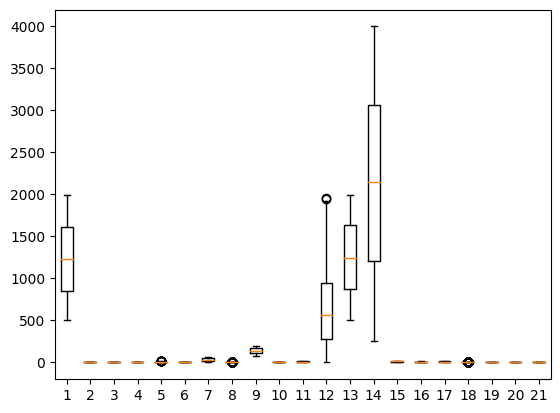

In [14]:
plt.boxplot(train) ## ploting box plot

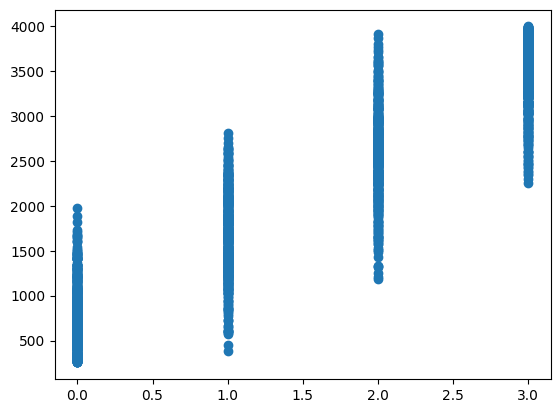

In [15]:
Y=train['ram'] ## ploting scatter plot ram vs price range
x=train['price_range']
plt.scatter(x,Y)

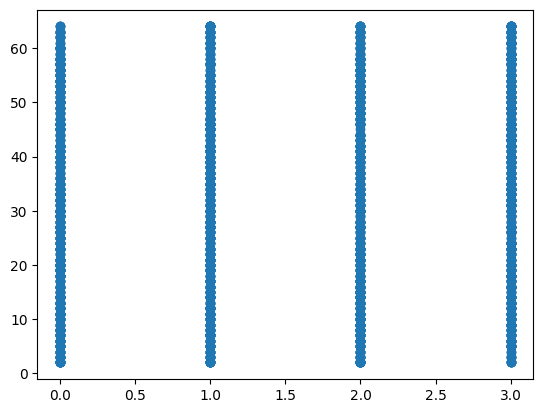

In [16]:
Y=train['int_memory'] ## ploting scatter Int_memory vs price range
x=train['price_range']
plt.scatter(x,Y)

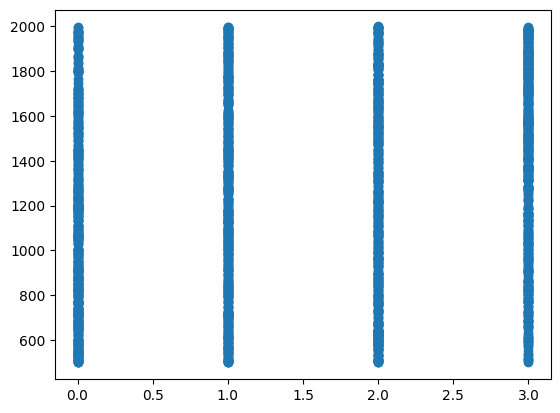

In [17]:
Y=train['battery_power'] ## ploting scatter plot battery_power vs price range
x=train['price_range']
plt.scatter(x,Y)

([<matplotlib.patches.Wedge at 0x7fb194b998a0>,
 [Text(-0.8054050133969238, 0.7492147652009409, '1'),
  Text(0.8054050133969238, -0.749214765200941, '0')])

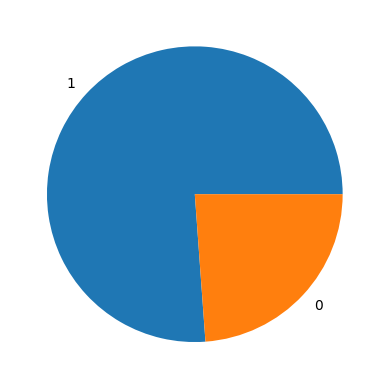

In [18]:
data=train['three_g'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
data.head(2)
labels=data.sub_cat_values
value=data.counts
fig=plt.figure()
ax=plt.subplot()
ax.pie(value,labels=labels )

([<matplotlib.patches.Wedge at 0x7fb194a080a0>,
 [Text(-0.0742421550154638, 1.097491732278043, '1'),
  Text(0.07424215501546366, -1.0974917322780433, '0')])

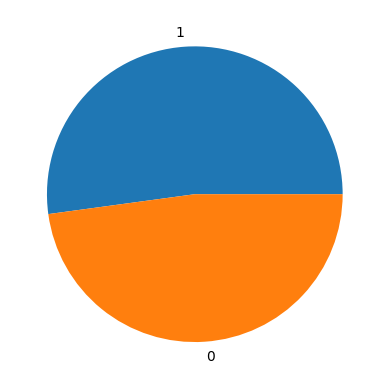

In [19]:
data=train['four_g'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
data.head(2)
labels=data.sub_cat_values
value=data.counts
fig=plt.figure()
ax=plt.subplot()
ax.pie(value,labels=labels )

In [20]:
train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011113,-0.041847,0.033334,0.015665,-0.004004,0.023847,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.013277,0.035198,0.003593,0.013443,0.041177,0.042540,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011113,0.013277,1.000000,-0.014762,0.003935,-0.033247,0.007011,-0.008068,0.003349,0.014090,...,-0.004256,0.000046,0.015202,-0.019511,-0.002766,-0.004805,-0.034722,0.022139,-0.022822,0.006837
dual_sim,-0.041847,0.035198,-0.014762,1.000000,-0.029123,0.003187,-0.015679,-0.000031,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,0.003935,-0.029123,1.000000,-0.016560,-0.029133,0.030951,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.033247,0.003187,-0.016560,1.000000,0.008690,-0.014650,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.007011,-0.015679,-0.029133,0.008690,1.000000,0.005176,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.023847,0.042540,-0.008068,-0.000031,0.030951,-0.014650,0.005176,1.000000,0.002056,0.031055,...,-0.025239,-0.034382,0.007241,-0.034169,-0.012453,-0.014776,0.001472,0.034290,0.001152,0.001996
mobile_wt,0.001844,-0.008605,0.003349,-0.008979,0.023618,-0.016537,-0.034214,0.002056,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,0.014090,-0.024658,-0.013356,-0.029706,-0.028310,0.031055,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

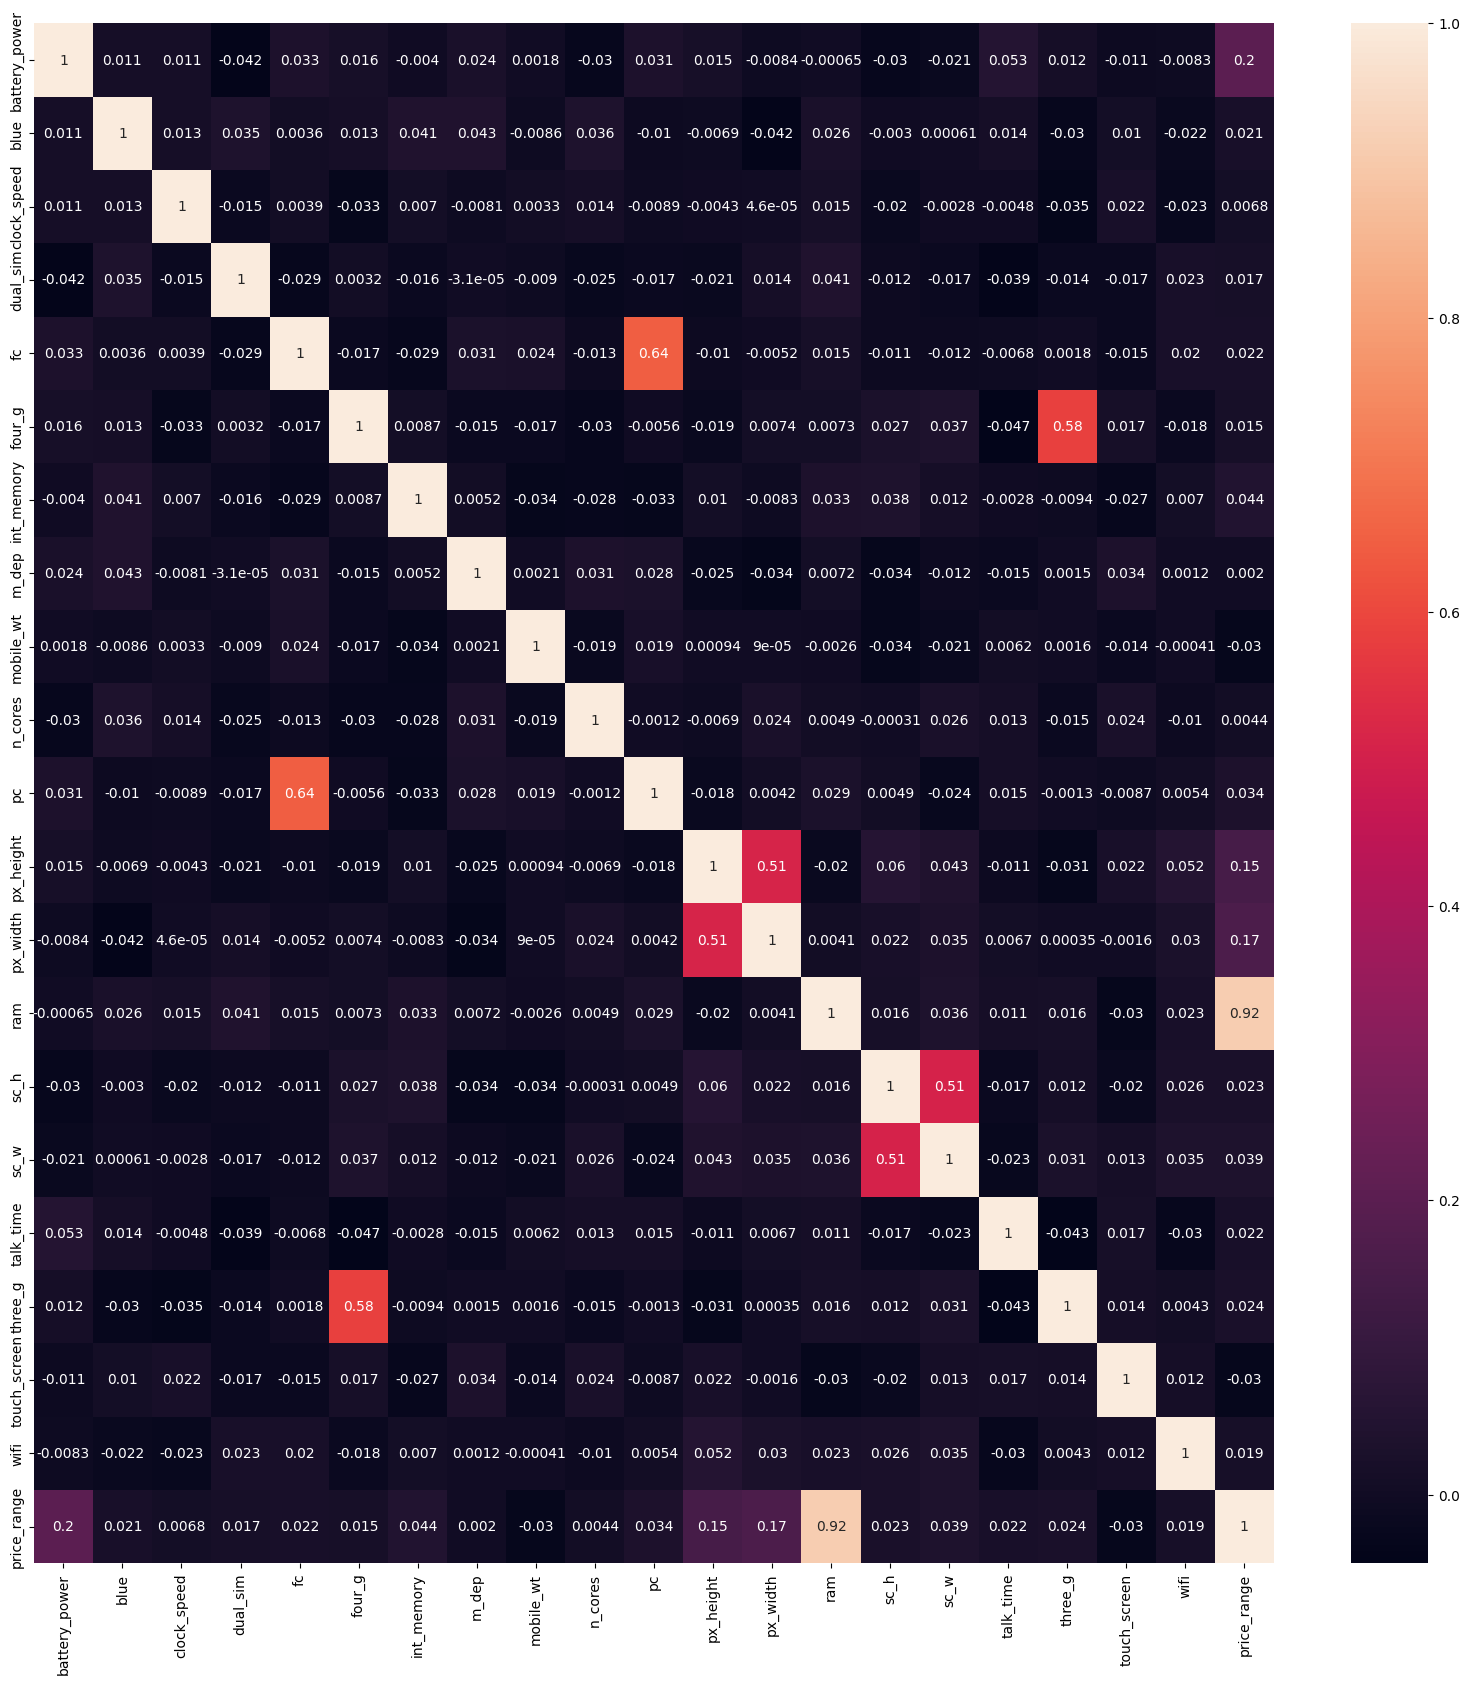

In [21]:
plt.figure(figsize=(20,20))  #### ploting the correlation heatmap
sns.heatmap(train.corr(),annot=True)

In [22]:
X=train.drop('price_range',axis=1)
y=train['price_range']

# Data Splitting
Split the dataset into a training set and a testing set with a ratio of 80:20. The training set was used to train the models, while the testing set was used to evaluate its performance.

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Support Vector Classification.

In [24]:
from sklearn.svm import SVC
clf=SVC(kernel="linear")
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
y_pred=clf.predict(X_test)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 2, 3, 2,
       0, 1, 0, 0, 3, 3, 1, 1, 2, 0, 3, 2, 2, 2, 1, 0, 2, 0, 3, 2, 2, 0,
       0, 3, 1, 0, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 3, 2, 1, 2, 0, 0, 0, 0, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 0, 1, 0, 1, 3, 0, 1, 2, 1, 3, 2, 1, 2, 2,
       2, 0, 3, 1, 2, 1, 1, 2, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, 3, 3,
       3, 1, 2, 0, 0, 3, 3, 1, 3, 0, 3, 2, 0, 3, 3, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 1, 1, 2, 3, 2, 2, 2, 0, 1, 2, 1, 3, 3, 3, 2, 0, 2,
       3, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 3, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 3, 2, 0, 3, 1, 2, 1,
       3, 2, 0, 3, 0, 1, 2, 2, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2,
       0, 1, 1, 2, 2, 3, 0, 3, 2, 1, 0, 3, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1,
       3, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 0, 1, 1, 1,
       3, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 3, 1,

<Axes: >

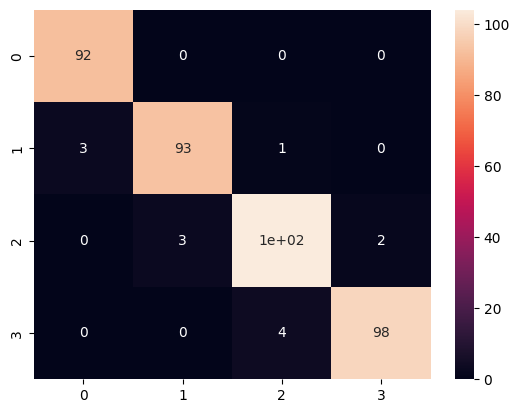

In [26]:
from sklearn import metrics # confusion matrix
cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [27]:
from sklearn.metrics import accuracy_score ## accuracy score
accuracy_score(y_test,y_pred)

0.9675

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) ## classification report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        92
           1       0.97      0.96      0.96        97
           2       0.95      0.95      0.95       109
           3       0.98      0.96      0.97       102

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

